#Кафетерий

##Загрузка данных




In [ ]:

'''Подготовка таблицы'''
!date
!pip -V
!pwd
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade gspread
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
table = gc.open_by_key('1zXgcbWX2IYBOjEgJ0jGNg4WvUHWDhSZAo3y-XzPV-zQ')
print(table.worksheets())
print (dir(table))

Wed May 19 08:01:12 UTC 2021
pip 19.3.1 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
[<Worksheet 'Income Planned' id:421670937>, <Worksheet 'SalaryInsurance' id:190018018>, <Worksheet 'FixedAssets' id:730720000>, <Worksheet 'CapitalСredit' id:2127266000>, <Worksheet 'Aside Prices' id:921323602>, <Worksheet 'Expenses' id:554214749>, <Worksheet 'Raw' id:1092156811>, <Worksheet 'Credits' id:1788868270>, <Worksheet 'Diagram' id:556306020>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__st

##Прибыль


In [ ]:
'''Используем упрощеную систему налогооложения'''
'''--------------------------------------------'''
'''Планируемые доходы'''
worksheet = table.worksheet("Income Planned")
rows = worksheet.get_all_values()
#print(rows)
name = list()
price = list()
count = list()
value = list()
value_sh = list()
value_raw = list()
i=0
for row in rows:
  if(i>3):
    print (i, row)
    name.append(row[0])
    price.append(float(row[2]))
    count.append(int(row[3]))
    value.append(float(row[2])*int(row[3]))
    value_raw = list()
    value_raw.append(float(row[2])*int(row[3]))
    value_sh.append(value_raw)
  # print(value_raw, value_sh)
  i+=1
print(value_sh)
worksheet.update('E5:E100', value_sh)
print('\nworksheet.get_all_values()',worksheet.get_all_values())
print('\n',name, price, count, value, sep='\n', end='\n\n')
proceeds = sum(value)
print('Планируемые доходы в год составят:', proceeds)
print('Планируемые доходы в месяц составят:', proceeds // 12)

4 ['Пирог', 'руб/услуга', '350', '600', '210000']
5 ['Пироженое', 'руб/услуга', '60', '14600', '876000']
6 ['Торт(на заказ)', 'руб/услуга', '950', '400', '380000']
7 ['Печенье', 'руб/услуга', '40', '7300', '292000']
8 ['Сладкая выпечка', 'руб/услуга', '80', '14600', '1168000']
9 ['Хлеб', 'руб/услуга', '50', '3650', '182500']
10 ['Кофе', 'руб/услуга', '100', '3650', '365000']
11 ['Чай', 'руб/услуга', '150', '10950', '1642500']
12 ['Молочный коктейль', 'руб/услуга', '100', '730', '73000']
13 ['Соки', 'руб/услуга', '170', '1460', '248200']
14 ['Вода', 'руб/услуга', '100', '1825', '182500']
[[210000.0], [876000.0], [380000.0], [292000.0], [1168000.0], [182500.0], [365000.0], [1642500.0], [73000.0], [248200.0], [182500.0]]

worksheet.get_all_values() [['Таблица . Плановые доходы (для целей налогообложения)', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['Наименование услуги', 'Единицы измерения', 'Цена', 'Количество за год', 'Выручка'], ['Пирог', 'руб/услуга', '350', '600', 

[['', ''], ['', ''], ['', ''], ['1', '100'], ['2', '110'], ['3', '120'], ['4', '130'], ['5', '140'], ['6', '150']]
3 ['1', '100']
4 ['2', '110']
5 ['3', '120']
6 ['4', '130']
7 ['5', '140']
8 ['6', '150']


['1', '2', '3', '4', '5', '6']
[]

[] []


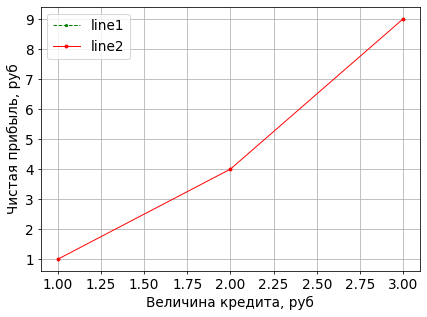

total 0
Sun May  2 09:54:02 UTC 2021


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

'''Используем упрощеную систему налогооложения'''
'''--------------------------------------------'''
'''Планируемые доходы'''
worksheet = table.worksheet("Diagram")
rows = worksheet.get_all_values()
print(rows)
i=0
for row in rows:
  if(i>2):
    print (i, row)
    name.append(row[0])
  i+=1
print('\n',name, price, sep='\n', end='\n\n')
name = list()
price = list()
x = name
ys = price
print(x,ys)
fig = plt.figure(figsize=(7,5),dpi=70)
#fig.legend(title = "Рис.1. Зависимость прибыли от величины кредита", title_fontsize=16, loc='lower center', loc )
#plt.title(label='Рис.1. Зависимость прибыли от величины кредита', fontsize= 18, horizontalalignment='center')
plt.plot(x,ys, 'g*--', label='line1', linewidth=1, markersize=3)
plt.plot([1, 2, 3], [1, 4, 9], 'ro-', label='line2', linewidth=1, markersize=3)
plt.xticks(fontsize=14)
plt.xlabel('Величина кредита, руб',fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Чистая прибыль, руб', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
#plt.fill_between(x, ys, 7, where=(ys > 6.5), facecolor='g', alpha=0.6)
plt.show()
#fig.savefig('/content/sample_data/scatter.png')
#%ll -lAF /content/sample_data/
%ll -lAF  /content/drive/MyDrive/'Colab Notebooks'/plot
!date


##Затраты

In [ ]:
'''Планируемая зарплата и страховые взносы'''
worksheet = table.worksheet("SalaryInsurance")
rows = worksheet.get_all_values()
#print(rows)
name = list()
permanent_salary = list()
percentage_of_revenue = list()
insurance= list()
i = 0 
for row in rows:
  if(i>2):
    print (i, row)
    name.append(row[0])
    permanent_salary.append(float(row[1]))
    percentage_of_revenue.append(float(row[2]))
    insurance.append(float(row[3]))
  i+=1
print('\n', name, permanent_salary, percentage_of_revenue, insurance, sep='\n', end='\n\n')
print('Выручка: ',proceeds)
all_permanent_salary = 12 *sum(permanent_salary)
print('Постоянная составляющая зарплаты:', all_permanent_salary) 
all_variable_salary =  proceeds*(sum(percentage_of_revenue))/100
print('Переменная составляющая зарплаты', all_variable_salary)
all_salary = all_permanent_salary + all_variable_salary 
print('Зарплата (постоянная + переменная), в тч НДФЛ: ', all_salary)
insurance = insurance[0]*all_salary/100
print('Страховые взносы', insurance)
personnel_costs = all_salary + insurance
print('Планируемая зарплата и страховые взносы:', personnel_costs)


3 ['Директор', '32850', '1', '30', '13']
4 ['Кондитер', '30450', '5', '30', '13']
5 ['Официант', '21750', '0.5', '30', '13']
6 ['Уборщица', '16530', '0.5', '30', '13']


['Директор', 'Кондитер', 'Официант', 'Уборщица']
[32850.0, 30450.0, 21750.0, 16530.0]
[1.0, 5.0, 0.5, 0.5]
[30.0, 30.0, 30.0, 30.0]

Выручка:  5619700.0
Постоянная составляющая зарплаты: 1218960.0
Переменная составляющая зарплаты 393379.0
Зарплата (постоянная + переменная), в тч НДФЛ:  1612339.0
Страховые взносы 483701.7
Планируемая зарплата и страховые взносы: 2096040.7


In [ ]:
'''Основные средства'''
worksheet = table.worksheet("FixedAssets")
rows = worksheet.get_all_values()
#print(rows)
name = list()
price = list()
count = list()
value = list()
i=0
for row in rows:
  if(i>3):
    print (i, row)
    name.append(row[1])
    price.append(float(row[2]))
    count.append(int(row[3]))
    value.append(float(row[2])*int(row[3]))
  i+=1
print('\n', name, price, count, value, sep='\n', end='\n\n')
FixedAssets_Cost = sum(value)
print('Основные средства:', FixedAssets_Cost)

4 ['кондитерский цех', 'Печь пекарская ХПЭ-750/500.11 нержавейка', '44000', '2']
5 ['кондитерский цех/кладовая готовой продукции', 'Скалка с вращающимися ручками 300х60 мм, липа', '374', '3']
6 ['кондитерский цех', 'Шкаф расстойный АРГО 30', '21774', '1']
7 ['кондитерский цех', 'Гриль-вафельница WB-01 JEJU', '10000', '2']
8 ['тopгoвый и бaнкeтный зaл', 'Витрина кондитерская OCTAVA K 1200', '70000', '3']
9 ['кондитерский цех', 'Машина посудомоечная фронтальная АВАТ МПК-500Ф', '114000', '1']
10 ['тopгoвый и бaнкeтный зaл', 'Стол и стулья', '13000', '5']
11 ['кондитерский цех', 'Тестомес ERGO HS20', '55888', '1']
12 ['помещение для персонала', 'Шкаф для одежды', '11500', '1']


['Печь пекарская ХПЭ-750/500.11 нержавейка', 'Скалка с вращающимися ручками 300х60 мм, липа', 'Шкаф расстойный АРГО 30', 'Гриль-вафельница WB-01 JEJU', 'Витрина кондитерская OCTAVA K 1200', 'Машина посудомоечная фронтальная АВАТ МПК-500Ф', 'Стол и стулья', 'Тестомес ERGO HS20', 'Шкаф для одежды']
[44000.0, 374.0, 2

In [ ]:
'''Уставной капитал, кредит'''
worksheet = table.worksheet("CapitalСredit")
rows = worksheet.get_all_values()
#print(rows)
name = list()
value = list()
i=0
for row in rows:
  if(i>3):
    print (i, row)
    name.append(row[0])
    value.append(float(row[1]))
  i+=1
capital = value[0]
print(name[0], capital)
credit = value[1]
print(name[1], credit)
percent = value[2]
print(name[2], percent)
cost_of_credit = credit*percent/100
print('Годовая стоимость кредита составит: ',cost_of_credit)


4 ['Уставной капитал, руб', '100000']
5 ['Величина кредита, руб', '700000']
6 ['Годовая процентная ставка, %', '11']
Уставной капитал, руб 100000.0
Величина кредита, руб 700000.0
Годовая процентная ставка, % 11.0
Годовая стоимость кредита составит:  77000.0


In [ ]:
'''Текущие расходы'''
worksheet = table.worksheet("Expenses")
rows = worksheet.get_all_values()
#print(rows)
name = list()
value = list()
i=0
for row in rows:
  if(i>0) and (i<8):
    print (i, row)
    name.append(row[0])
    value.append(float(row[1]))
  i+=1
current_expensis = sum(value)
print('Текущие расходы в течение года: : ', current_expensis)
print('Текущие расходы в течение месяца: : ', current_expensis//12)

1 ['Аренда помещения', '200000', '', 'https://nn.cian.ru/rent/commercial/255142391/']
2 ['Коммунальные платежи', '60000', '', 'см. ниже']
3 ['Сырьё для продукции', '46080', '', 'см. лист "Сырьё"']
4 ['Сигнализация', '14000', '', 'https://www.delta.ru/ohrana-restoranov/']
5 ['Реклама', '15000', 'размещение на 100 стендов', 'https://www.ra-most.ru/stendy-v-podezdah/']
6 ['Обслуживание сайта', '160', '', 'https://fozzy.com/ru/ecommerce.shtml#steps']
7 ['Банковское обслуживание', '3500', 'Счёт "ВЭД без границ"', 'https://www.sberbank.ru/ru/s_m_business/open-accounts']
Текущие расходы в течение года: :  338740.0
Текущие расходы в течение месяца: :  28228.0


##Налоги и доход

In [ ]:
'''Налоги и прибыль'''
print('Планируемые доходы составят:', proceeds)
print('Затраты на зарплату в том числе страховые взносы  составят :', personnel_costs)
print('Стоимость основных средств составит:', FixedAssets_Cost)
print('Годовая стоимость кредита составит: ',cost_of_credit)
print('Текущие расходы в течение года: ',current_expensis)
incom_expenses = proceeds - personnel_costs - FixedAssets_Cost - cost_of_credit - current_expensis
print('Доходы - Расходы:', incom_expenses)
income_tax = 15 # налог на прибыль, %
value_of_income_tax = income_tax * incom_expenses / 100.
print ('Налог  на прибыль составит: ', value_of_income_tax )
print ('Чистая прибыль составит : ', incom_expenses - value_of_income_tax )

Планируемые доходы составят: 5619700.0
Затраты на зарплату в том числе страховые взносы  составят : 2096040.7
Стоимость основных средств составит: 587284.0
Годовая стоимость кредита составит:  77000.0
Текущие расходы в течение года:  345000.0
Доходы - Расходы: 2514375.3
Налог  на прибыль составит:  377156.295
Чистая прибыль составит :  2137219.005
